# Agenda

Recommendation System ChatBot

- Approach 1: OpenAI- gpt3.5 - using API key [not free]
  - Use runtime - CPU
- Approach 2: HuggingFace model- Flan T5 model [Free]
  - Use runtime - GPU

# Installation

In [ ]:
!pip install embedchain

In [ ]:
!pip install embedchain[huggingface-hub] embedchain[opensource]

## Video Tutorial - Step-by-step explaination along with Workflow

### Like and Subscribe:

[![](https://i.ytimg.com/an_webp/vBBRwDca5Uo/mqdefault_6s.webp?du=3000&sqp=CL6xyakG&rs=AOn4CLAsGVQqVydwCabF63TGKCXELtIdsw)](https://www.youtube.com/watch?v=vIhDh7H73Ww)

## Import the libraries

In [ ]:
import os #operating system=> store the key in environment variables
from embedchain import App
from getpass import getpass #optional

> Note:
>
> Run Approach-1 block, if you have OpenAI API key
>
> Run Approach-2 block, if you don't have OpenAI API key

## Approach 1- OpenAI - GPT3.5

In [ ]:
#api_key = getpass("Enter your OpenAI API key:")
#os.environ["OPENAI_API_KEY"] = api_key

Enter your OpenAI API key:··········


## Approach 2- HuggingFace Model - Flan T5

In [ ]:
hf_token = getpass("Enter your HF Access token")
os.environ["HUGGINGFACE_ACCESS_TOKEN"] = hf_token

Enter your HF Access token··········


In [ ]:
# create config.yaml file.
config = """
llm:
  provider: huggingface
  config:
    model: 'google/flan-t5-xxl'
    temperature: 0.5
    max_tokens: 1000
    top_p: 0.8
    stream: false

embedder:
  provider: huggingface
  config:
    model: 'sentence-transformers/all-mpnet-base-v2'
"""

# Write the multi-line string to a YAML file
with open('huggingface.yaml', 'w') as file:
    file.write(config)

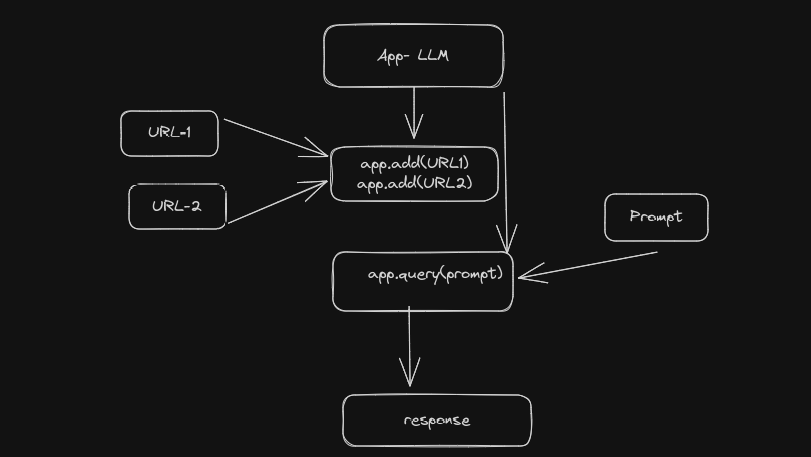

In [ ]:
#app = App()- approach OpenAI
app = App.from_config(yaml_path="huggingface.yaml")

# Add your data

> Download the dataset in csv file from Kaggle
>
> Dataset: [Mobile Recommendation System Dataset](https://www.kaggle.com/datasets/gyanprakashkushwaha/mobile-recommendation-system-dataset)
>
> Upload the dataset to the colab, rename it as data.csv

In [ ]:
import pandas as pd

data = pd.read_csv("data.csv")
data.sample(7)

,name,ratings,price,imgURL,corpus
1968,"SAMSUNG Galaxy S23 Ultra 5G (Green, 1 TB)",4.3,23927,https://rukminim2.flixcart.com/image/312/312/x...,Storage1 TBRAM12 SystemAndroid 13Processor Ty...
1086,"realme C33 (Night Sea, 64 GB)",4.4,9999,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 GBExpandable Storage1TB Syst...
1088,"APPLE iPhone XR (Yellow, 128 GB)",4.6,23837,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 14.2Processor TypeA12 Bi...
2532,"APPLE iPhone 13 Pro (Graphite, 128 GB)",4.7,11172,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...
2490,"OPPO A77 (Sky Blue, 128 GB)",4.2,"₹15,999",https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM4 GBExpandable Storage1TB Sys...
127,"OPPO A57 (Glowing Gold, 64 GB)",4.3,"₹14,999",https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 GBExpandable Storage1TB Syst...
2283,"Tecno Pova Neo 5G (Sapphire Black, 128 GB)",3.9,15499,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM4 GBExpandable Storage1TB Sys...


In [ ]:
data.drop("imgURL",axis=1,inplace=True)

In [ ]:
data.head()

,name,ratings,price,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,Storage128 SystemiOS 15Processor TypeA15 Bion...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2546 non-null   object 
 1   ratings  2546 non-null   float64
 2   price    2546 non-null   object 
 3   corpus   2534 non-null   object 
dtypes: float64(1), object(3)
memory usage: 79.7+ KB


In [ ]:
data.shape

(2546, 4)

In [ ]:
data = data.iloc[0:200]

In [ ]:
data.shape

(200, 4)

In [ ]:
data.to_csv("new_cleaned_data.csv",index=False)

In [ ]:
app.add("new_cleaned_data.csv",data_type="csv")

Doc content has not changed. Skipping creating chunks and embeddings


'bbdb33d42dbf620990f9515b9078bd6f'

In [ ]:
prompt = input("Enter your prompt")
template = f"""You are a Mobile recommendation bot, you only answer relevant to the context
..
.
.
.
PROMPT: {prompt}"""
response = app.query(template)

Enter your promptmobile name with 4+ rating


In [ ]:
print(response)

a 10e


## User Interface

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
with gr.Blocks() as demo:
    chatbot = gr.Chatbot() # user inferface
    msg = gr.Textbox() # this will create a entry box to the user to enter the prompt
    clear = gr.ClearButton([msg, chatbot]) #clear the text from entry box

    def predict(message, chat_history):
      response = app.query(message)
      chat_history.append((message, response))
      return "", chat_history


    msg.submit(predict, [msg, chatbot], [msg, chatbot])

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ab50d6bb2f29236843.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
